In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Embedding,SimpleRNN,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences 
from sklearn.model_selection import train_test_split

In [15]:
data=pd.read_csv("D:\\Source_code\\Lab\\data\\IMDB Dataset.csv")

X=data['review']
Y=data['sentiment'].map({'positive':1,'negative':0})

tokenizer=Tokenizer(10000,oov_token='<oov>')
tokenizer.fit_on_texts(X)
X=pad_sequences(tokenizer.texts_to_sequences(X),maxlen=200)


In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
logs={}

model=Sequential([
    Embedding(10000,32),
    SimpleRNN(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
logs['rnn']=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)

model=Sequential([
    Embedding(10000,32),
    LSTM(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
logs['lstm']=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)

model=Sequential([
    Embedding(10000,32),
    GRU(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
logs['gru']=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6753 - loss: 0.5911 - val_accuracy: 0.7729 - val_loss: 0.4748
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8580 - loss: 0.3291 - val_accuracy: 0.8603 - val_loss: 0.3615
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9026 - loss: 0.2400 - val_accuracy: 0.8815 - val_loss: 0.3067
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9138 - loss: 0.2179 - val_accuracy: 0.8761 - val_loss: 0.3018
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9334 - loss: 0.1751 - val_accuracy: 0.8707 - val_loss: 0.3162
Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6529 - loss: 9952939737088.0000 - val_accuracy: 0.7183 - val_loss: 0.6564
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.7391 - loss: 0.6262 - val_accuracy: 0.7224 - val_loss: 81.1005
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7525 - loss: 1235

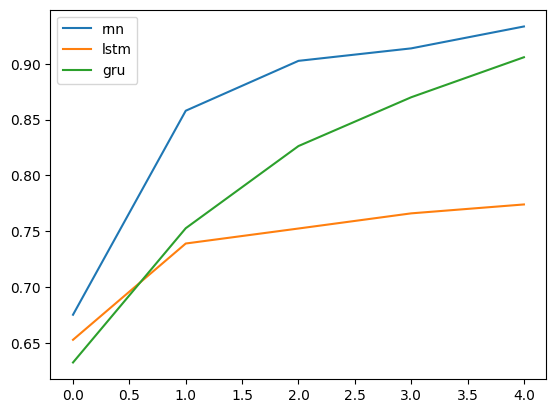

In [19]:
for i in logs:
    plt.plot(logs[i].history['accuracy'],label=i)
plt.legend()
plt.show()